In this project, we want to observe what are the factors affecting Hollywood movie sales. 

The dataset was found in Kaggle through the following link:
www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies

and at the end was merged with IMDB dataset which can be found in www.imdb.com/interfaces/

In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
sb.set()

In [2]:
# importing data
df = pd.read_csv("Highest Holywood Grossing Movies.csv").iloc[:,1:]
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [3]:
# checking the null values
df.isna().sum()

Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

In [4]:
# selecting sales columns
salesCols = df.columns[4:7]
salesCols

Index(['Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)'],
      dtype='object')

In [5]:
# displaying the statistical data
df[salesCols].describe()

,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,9.180000e+02,9.180000e+02,9.180000e+02
mean,1.677469e+08,2.301434e+08,3.968668e+08
std,1.040360e+08,2.176011e+08,3.082629e+08
min,8.036084e+07,2.600000e+02,8.160000e+07
25%,1.016071e+08,8.845620e+07,2.005564e+08
50%,1.321351e+08,1.638819e+08,3.019416e+08
75%,1.913905e+08,2.885577e+08,4.750718e+08
max,9.366622e+08,2.086739e+09,2.847246e+09


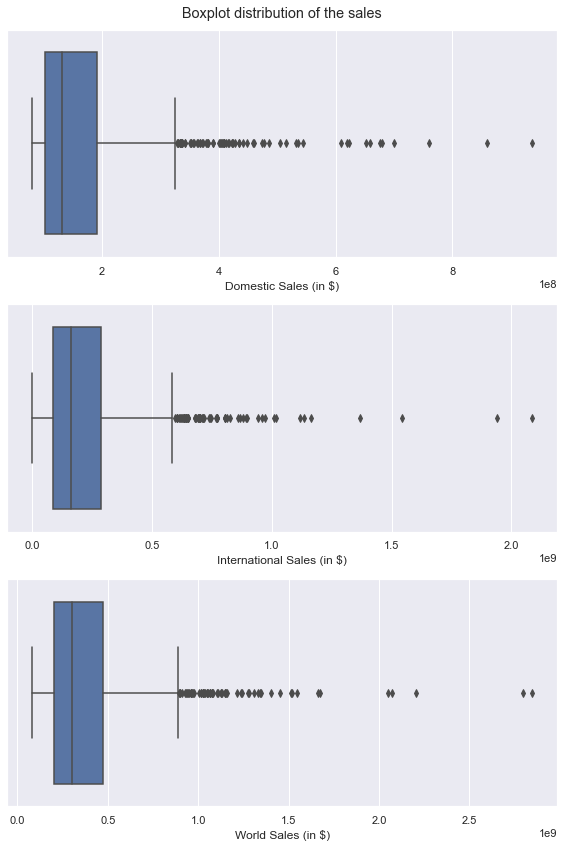

In [6]:
# plotting the sales distribution
f, axes = plt.subplots(3, figsize = (8, 12))
for i in range(len(salesCols)):
    sb.boxplot(data=df, x=salesCols[i], orient="h", ax = axes[i])
plt.suptitle("Boxplot distribution of the sales")
plt.tight_layout()
plt.show()

In [7]:
# finding the outliers
def findOutliers(data, column):
    q1 = np.quantile(data[column], 0.25)
    q3 = np.quantile(data[column], 0.75)
    iqr = q3 - q1
    upperBound = q3 + (1.5 * iqr)
    lowerBound = q1 - (1.5 * iqr)
    outliers = len(data.loc[(data[column] > upperBound) | (data[column] < lowerBound)])
    print("Number of outliers for", column, "is:", outliers)

for var in salesCols:
    findOutliers(df, var)

Number of outliers for Domestic Sales (in $) is: 70
Number of outliers for International Sales (in $) is: 64
Number of outliers for World Sales (in $) is: 65


It is observed that the distribution of the domestic sales and the international sales doesn’t differ very much. However, the scale (x-axis) is bigger for international sales and therefore international sales are higher in general compared to domestic sales. We also noticed that world sales are defined as the summation of domestic and international sales added up together.

## Top Sales based on different variables

Besides wanting to know how different variables are affecting the sales, we also want to observe which distributors and movie titles have the highest sales.

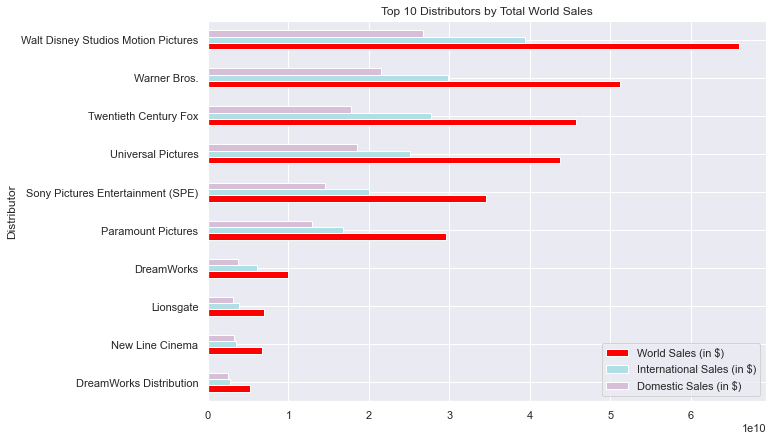

In [51]:
# plotting the top 10 distributors by total sales
dfTemp = df2.groupby('Distributor').sum().iloc[:,:3].sort_values('World Sales (in $)').tail(10).reset_index()
dfTemp.plot.barh(x='Distributor',  y={'World Sales (in $)', 'Domestic Sales (in $)', 'International Sales (in $)'},
                color={'World Sales (in $)':'red', 'Domestic Sales (in $)':'thistle', 'International Sales (in $)':'powderblue'},
                figsize=(10, 7))
plt.title("Top 10 Distributors by Total World Sales")
plt.show()

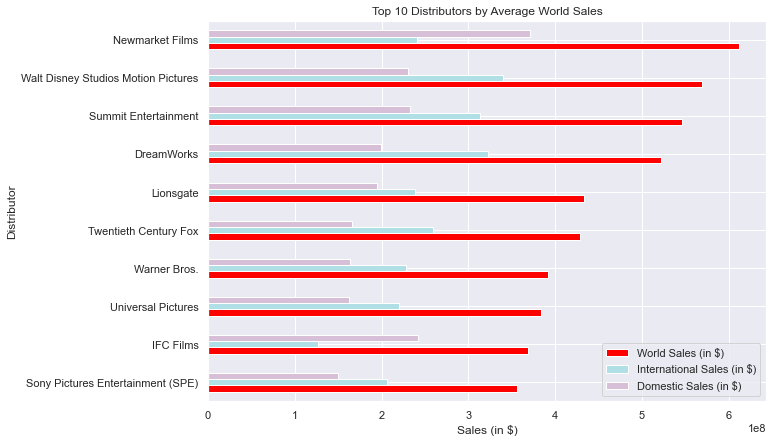

In [52]:
# plotting the top 10 distributors by average sales
dfTemp = df2.groupby('Distributor').mean().iloc[:,:3].sort_values('World Sales (in $)').tail(10).reset_index()
dfTemp.plot.barh(x='Distributor', y={'World Sales (in $)', 'Domestic Sales (in $)', 'International Sales (in $)'},
                color={'World Sales (in $)':'red', 'Domestic Sales (in $)':'thistle', 'International Sales (in $)':'powderblue'},
                figsize=(10, 7))
plt.xlabel("Sales (in $)")
plt.title("Top 10 Distributors by Average World Sales")
plt.xlabel("Sales (in $)")
plt.show()

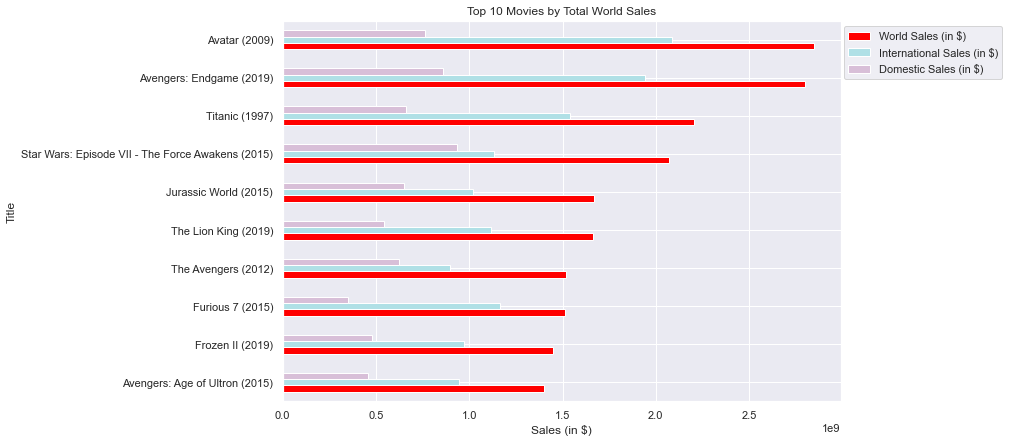

In [53]:
# plotting the top 10 movies by total sales
dfTemp = df2.groupby('Title').sum().iloc[:,:3].sort_values('World Sales (in $)').tail(10).reset_index()
dfTemp.plot.barh(x='Title', y={'World Sales (in $)', 'Domestic Sales (in $)', 'International Sales (in $)'},
                color={'World Sales (in $)':'red', 'Domestic Sales (in $)':'thistle', 'International Sales (in $)':'powderblue'},
                figsize=(10, 7))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.title("Top 10 Movies by Total World Sales")
plt.xlabel("Sales (in $)")
plt.show()

# Analysis of individual variables

Now we want to see if there is any pattern that can be found in each individual variable and how they have an impact on movie sales.

### Release Date

In [8]:
# removing null values
df2 = df[df['Release Date'].notna()]

In [9]:
# converting string to datetime
df2['Release Date'] = pd.to_datetime(df2['Release Date'], format='%B %d, %Y')
df2.dtypes

Title                                 object
Movie Info                            object
Distributor                           object
Release Date                  datetime64[ns]
Domestic Sales (in $)                  int64
International Sales (in $)             int64
World Sales (in $)                     int64
Genre                                 object
Movie Runtime                         object
License                               object
dtype: object

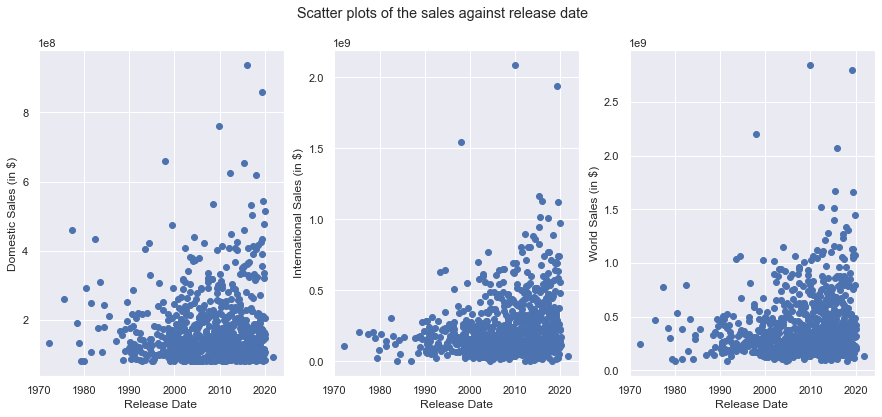

In [10]:
# plotting the sales against the release date
f, axes = plt.subplots(1, 3, figsize = (15, 6))
axes[0].scatter(x=df2['Release Date'], y=df2['Domestic Sales (in $)'])
axes[0].set_xlabel('Release Date')
axes[0].set_ylabel('Domestic Sales (in $)')
axes[1].scatter(x=df2['Release Date'], y=df2['International Sales (in $)'])
axes[1].set_xlabel('Release Date')
axes[1].set_ylabel('International Sales (in $)')
axes[2].scatter(x=df2['Release Date'], y=df2['World Sales (in $)'])
axes[2].set_xlabel('Release Date')
axes[2].set_ylabel('World Sales (in $)')
plt.suptitle("Scatter plots of the sales against release date")
plt.show()

Clearly later movies have a bigger range in sales compared to the old ones. This means that more movies are released (within this dataset) at a later time and more of them have varying values of sales. The top sales movies are mostly released at a later time (after 2000).

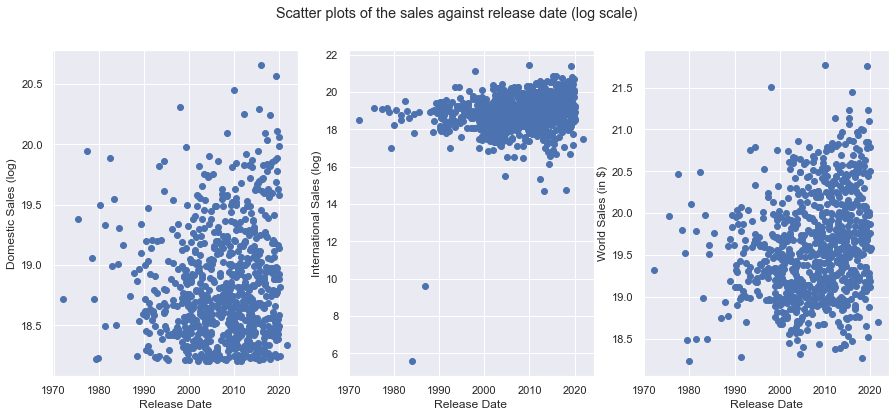

In [11]:
f, axes = plt.subplots(1, 3, figsize = (15, 6))
y1 = np.log(df2['Domestic Sales (in $)'])
axes[0].scatter(x=df2['Release Date'], y=y1)
axes[0].set_xlabel('Release Date')
axes[0].set_ylabel('Domestic Sales (log)')
y2 = np.log(df2['International Sales (in $)'])
axes[1].scatter(x=df2['Release Date'], y=y2)
axes[1].set_xlabel('Release Date')
axes[1].set_ylabel('International Sales (log)')
y3 = np.log(df2['World Sales (in $)'])
axes[2].scatter(x=df2['Release Date'], y=y3)
axes[2].set_xlabel('Release Date')
axes[2].set_ylabel('World Sales (in $)')
plt.suptitle("Scatter plots of the sales against release date (log scale)")
plt.show()

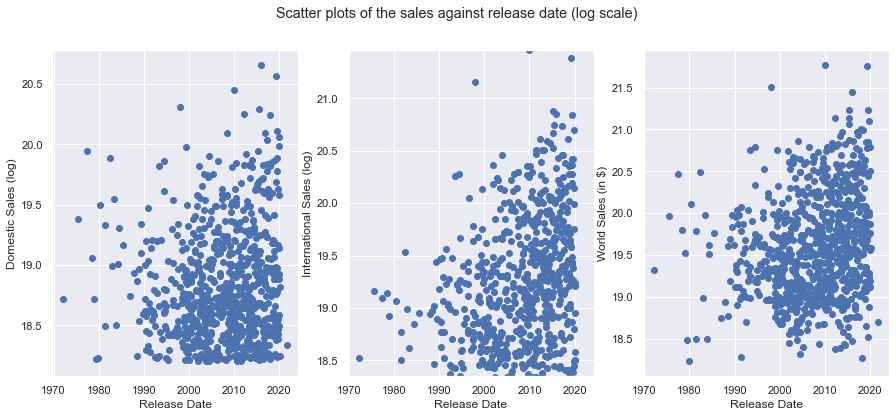

In [12]:
f, axes = plt.subplots(1, 3, figsize = (15, 6))
y1 = np.log(df2['Domestic Sales (in $)'])
axes[0].scatter(x=df2['Release Date'], y=y1)
axes[0].set_xlabel('Release Date')
axes[0].set_ylabel('Domestic Sales (log)')
y2 = np.log(df2['International Sales (in $)'])
axes[1].scatter(x=df2['Release Date'], y=y2)
axes[1].set_xlabel('Release Date')
axes[1].set_ylabel('International Sales (log)')
axes[1].set_ylim(y2.quantile(0.25), y2.quantile(1))
y3 = np.log(df2['World Sales (in $)'])
axes[2].scatter(x=df2['Release Date'], y=y3)
axes[2].set_xlabel('Release Date')
axes[2].set_ylabel('World Sales (in $)')
plt.suptitle("Scatter plots of the sales against release date (log scale)")
plt.show()

There isn't any clear pattern for the log scale of the sales either. We can see that International Sales has a relatively different plot compared to Domestic Sales and World Sales. However, when we zoom in the y axis starting from Q1, the plot looks relatively similar to the other two. This shows that International Sales has some outliers which are those extremely small values.

In [13]:
import calendar

In [14]:
# extracting the year from the date
df2['Year'] = pd.DatetimeIndex(df2['Release Date']).year

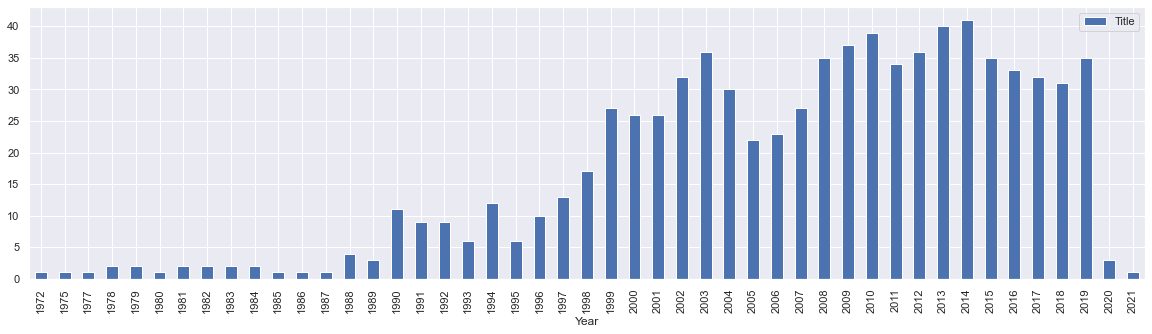

In [15]:
# plotting the number of movies per year
dfTemp = df2.groupby('Year').count().reset_index()
dfTemp.plot.bar(x='Year', y='Title', figsize=(20,5))
plt.show()

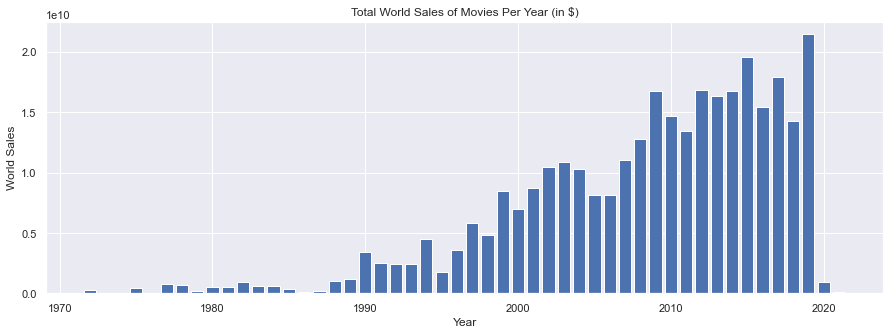

In [16]:
# plotting the total world sales of movies per year
dfTemp = df2.groupby('Year').sum().reset_index()
f, axes = plt.subplots(figsize = (15, 5))
axes.bar(x=dfTemp['Year'], height=dfTemp['World Sales (in $)'])
plt.xlabel("Year")
plt.ylabel("World Sales")
plt.title("Total World Sales of Movies Per Year (in $)")
plt.show()

We can see that in general there is an increase in the number of movies released (in this dataset) as the year increases. Besides, the total sales also increases as the year increases.

In [22]:
df2['Quarter'] = pd.DatetimeIndex(df2['Release Date']).quarter

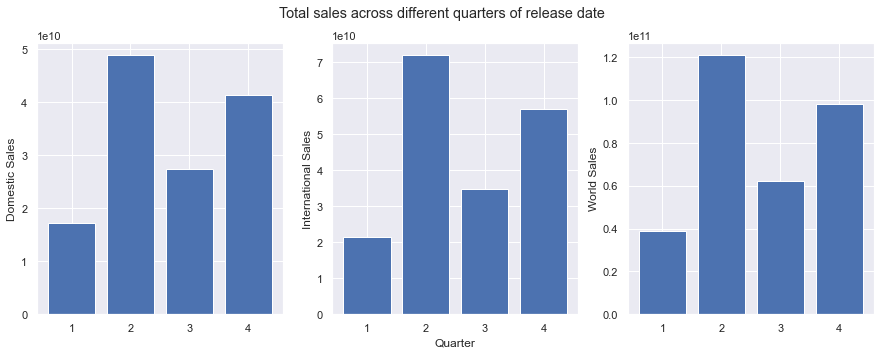

In [23]:
dfTemp = df2.groupby('Quarter').sum().iloc[:,:3].reset_index()
f, axes = plt.subplots(1, 3, figsize = (15, 5))
axes[0].bar(x=dfTemp['Quarter'], height=dfTemp['Domestic Sales (in $)'])
axes[0].set_ylabel("Domestic Sales")
axes[1].bar(x=dfTemp['Quarter'], height=dfTemp['International Sales (in $)'])
axes[1].set_ylabel("International Sales")
axes[1].set_xlabel("Quarter")
axes[2].bar(x=dfTemp['Quarter'], height=dfTemp['World Sales (in $)'])
axes[2].set_ylabel("World Sales")
plt.suptitle("Total sales across different quarters of release date")
plt.show()

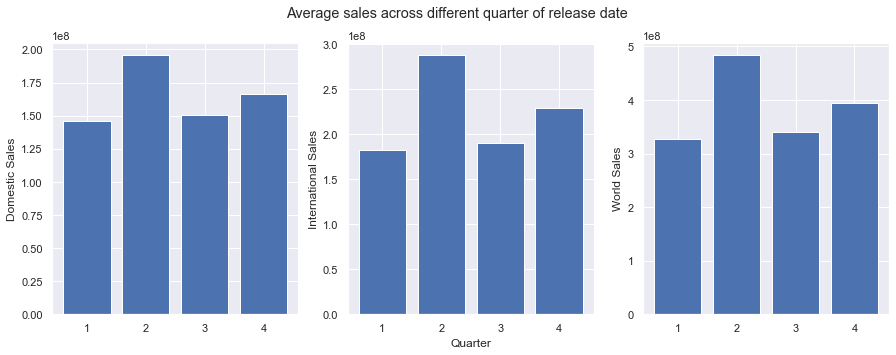

In [24]:
dfTemp = df2.groupby('Quarter').mean().iloc[:,:3].reset_index()
f, axes = plt.subplots(1, 3, figsize = (15, 5))
axes[0].bar(x=dfTemp['Quarter'], height=dfTemp['Domestic Sales (in $)'])
axes[0].set_ylabel("Domestic Sales")
axes[1].bar(x=dfTemp['Quarter'], height=dfTemp['International Sales (in $)'])
axes[1].set_ylabel("International Sales")
axes[1].set_xlabel("Quarter")
axes[2].bar(x=dfTemp['Quarter'], height=dfTemp['World Sales (in $)'])
axes[2].set_ylabel("World Sales")
plt.suptitle("Average sales across different quarter of release date")
plt.show()

For both the total and average sales, the second quarter has the highest value for all the sales, followed by the fourth quarter, third quarter, and finally the first quarter. We'll see in more details how the sales value differ for different months.

In [25]:
# extracting the month from the date
df2['Month'] = pd.DatetimeIndex(df2['Release Date']).month

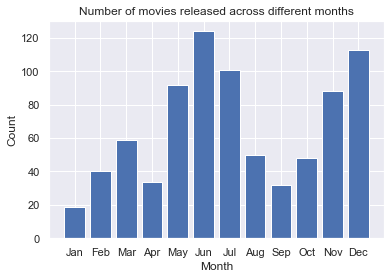

In [26]:
# plotting the number across different months
dfTemp = df2.groupby('Month').count()[['Title']].reset_index()
dfTemp['Month'] = dfTemp['Month'].apply(lambda x: calendar.month_abbr[x])
plt.bar(x=dfTemp['Month'], height=dfTemp['Title'])
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Number of movies released across different months")
plt.show()

We can see that the highest count of the released movies are in June and December while the lowest count are in January, April, and September. The high count in June and December might due to the holiday season. Therefore, from this plot we can infer that movie production prefers to release their movies in holiday season (summer or winter).

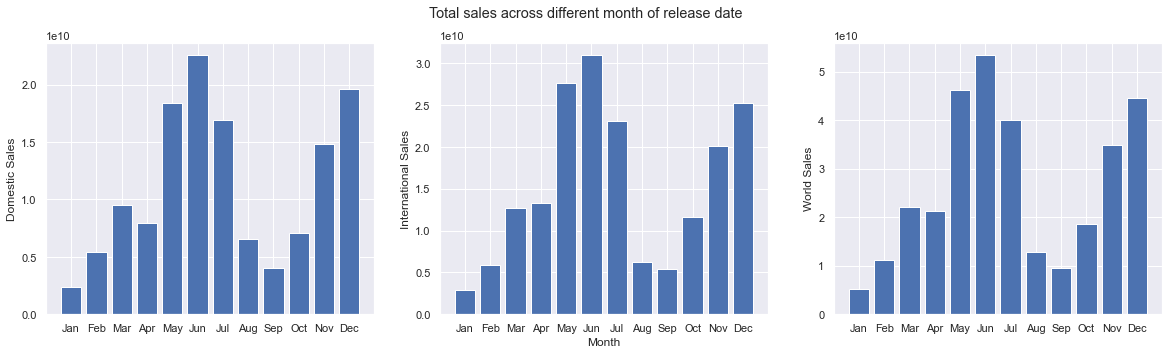

In [27]:
dfTemp = df2.groupby('Month').sum().iloc[:,:3].reset_index()
dfTemp['Month'] = dfTemp['Month'].apply(lambda x: calendar.month_abbr[x])
f, axes = plt.subplots(1, 3, figsize = (20, 5))
axes[0].bar(x=dfTemp['Month'], height=dfTemp['Domestic Sales (in $)'])
axes[0].set_ylabel("Domestic Sales")
axes[1].bar(x=dfTemp['Month'], height=dfTemp['International Sales (in $)'])
axes[1].set_ylabel("International Sales")
axes[1].set_xlabel("Month")
axes[2].bar(x=dfTemp['Month'], height=dfTemp['World Sales (in $)'])
axes[2].set_ylabel("World Sales")
plt.suptitle("Total sales across different month of release date")
plt.show()

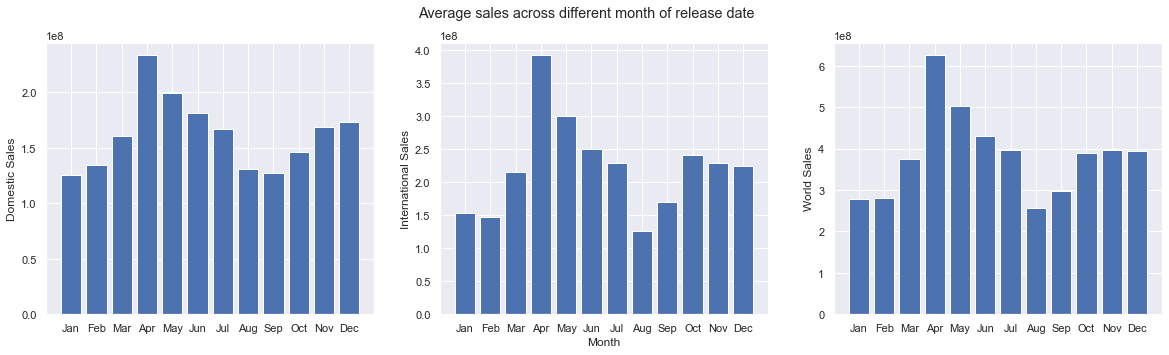

In [28]:
dfTemp = df2.groupby('Month').mean().iloc[:,:3].reset_index()
dfTemp['Month'] = dfTemp['Month'].apply(lambda x: calendar.month_abbr[x])
f, axes = plt.subplots(1, 3, figsize = (20, 5))
axes[0].bar(x=dfTemp['Month'], height=dfTemp['Domestic Sales (in $)'])
axes[0].set_ylabel("Domestic Sales")
axes[1].bar(x=dfTemp['Month'], height=dfTemp['International Sales (in $)'])
axes[1].set_ylabel("International Sales")
axes[1].set_xlabel("Month")
axes[2].bar(x=dfTemp['Month'], height=dfTemp['World Sales (in $)'])
axes[2].set_ylabel("World Sales")
plt.suptitle("Average sales across different month of release date")
plt.show()

The total sales are highest in June (followed relatively similar pattern with the movie counts). However, we noticed that the highest average sales happen in April where the movie counts is pretty low. This infers that even though there are not many movies released in April, the sales of the movies released in this month turns out to be higher than the other months. On the other hand, even though a lot of the movies are released in June, not all of them have high sales and therefore they don't have high average sales.

### Genre

In [34]:
# splitting the genres to different columns
genreList = pd.DataFrame(df2["Genre"].str.strip('[]').str.split(", ").explode().unique())[0].str.strip("''")
for genre in genreList:
    df2.loc[df2['Genre'].str.contains(genre), genre] = 1
    df2.loc[df2['Genre'].str.contains(genre)==False, genre] = 0

In [35]:
df2.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,...,Comedy,War,Biography,Mystery,Horror,Sport,Music,History,Western,Documentary
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# counting the number of movies are in different genres
genreCount = pd.DataFrame(df2.iloc[:,13:34].sum(axis=0)).reset_index()
genreCount.columns = ['Genre', 'Count']
genreCount['Total World Sales'] = 0

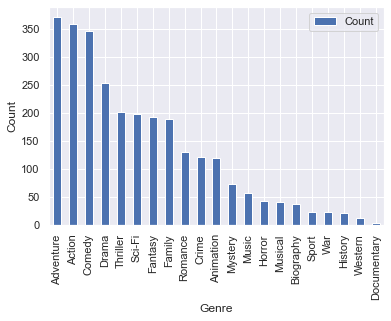

In [37]:
# plotting the number of counts
genreCount.sort_values('Count', ascending=False).plot.bar(x='Genre', y='Count')
plt.ylabel("Count")
plt.show()

We can see that Adventure is the most common genre, followed by Action and Comedy as the second and third respectively. Meanwhile, documentary is the least common genre with only two movies having this genre.

In [38]:
# calculating the average World Sales for each genre
for genre in genreCount['Genre']:
    genreCount.loc[genreCount['Genre']==genre, 'Total World Sales'] = df2.loc[df2[genre]==1, 'World Sales (in $)'].sum()
    
genreCount['Average World Sales'] = genreCount['Total World Sales'] / genreCount['Count']

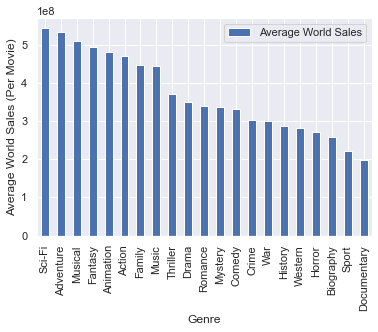

In [39]:
genreCount.sort_values('Average World Sales', ascending=False).plot.bar(x='Genre', y='Average World Sales')
plt.ylabel("Average World Sales (Per Movie)")
plt.show()

Even though Adventure, Action, and Comedy seem to be the most common genre, the top list is a bit different for the when it is compared against the average world sales. Adventure still has a relatively high average world sales by being in the second place. Meanwhile, Sci-Fi and Musical take over the Action and Comedy genres by being the first and third highest average world sales.

### Movie Title and Info

We now want to observe what words are the most common words in movie title and info.

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

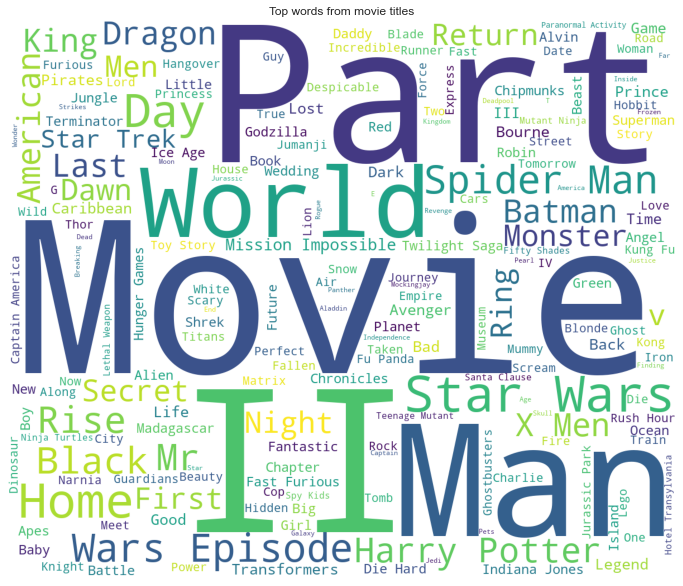

In [41]:
#let's find top words from movie Titles
plt.figure(figsize = (12, 12))
token_title = ' '.join(df['Title'].values) #create split to title by sprace to extract the text.
#bg color set to white for good contrast, by default bg color is darker
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from movie titles')
plt.axis("off") # we dont need axes for this
plt.show()

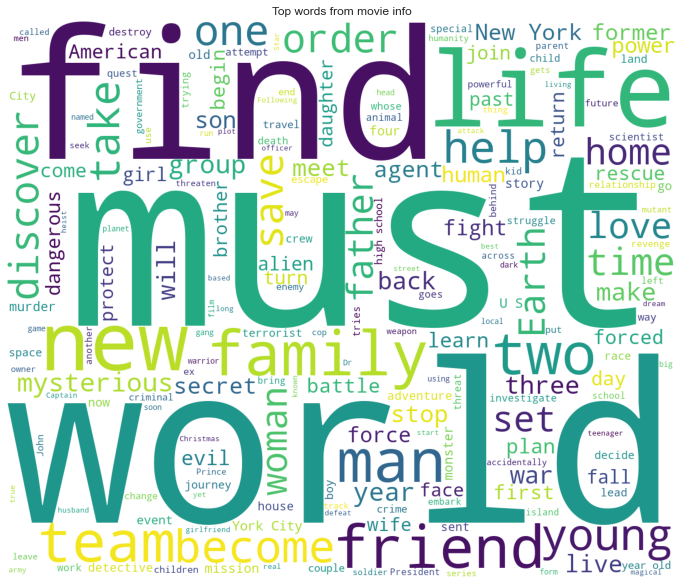

In [42]:
#let's find top words from movie info
plt.figure(figsize = (12, 12))
token_title = ' '.join(df['Movie Info'].values) #create split to title by sprace to extract the text.
#bg color set to white for good contrast, by default bg color is darker
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from movie info')
plt.axis("off") # we dont need axes for this
plt.show()

'II', 'Movie', and 'Part' seem to be the most common words in movie title. This might be not surprising since we often see these words as parts of the movie title, especially for the movies that have sequels. However, these words might not be useful when we perform further analysis such as sentiment analysis as these words do not contain emotion or sentiment.
On the other hand, 'must', 'find', and 'world' seem to be the most common words in movie info. These words might provide a good insight for sentiment analysis since they are relatively strong words to use.

### Movie Runtime

In [43]:
# converting the movie runtime into minutes
df2['Runtime (mins)'] = 0
df2['Runtime (mins)'] += df['Movie Runtime'].apply(lambda x: int(x.split(" hr")[0]))*60
df2.loc[df2['Movie Runtime'].str.contains('min'), 'Runtime (mins)'] += df.loc[df['Movie Runtime'].str.contains("min")]['Movie Runtime'].apply(lambda x: int(x.split("hr ")[1].split(" min")[0]))

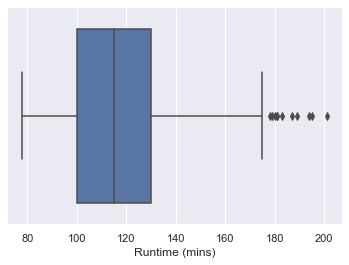

In [44]:
# plotting the runtime distribution
sb.boxplot(data=df2, x='Runtime (mins)', orient="h")
plt.show()

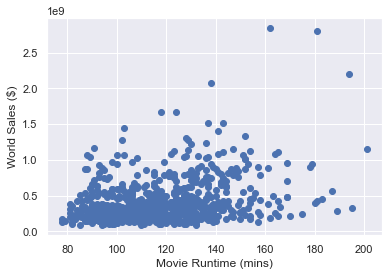

In [45]:
plt.scatter(df2['Runtime (mins)'], df2['World Sales (in $)'])
plt.xlabel("Movie Runtime (mins)")
plt.ylabel("World Sales ($)")
plt.show()

It seems that the movie runtime might have a linear relationship with the world sales. We shall see their exact relation in the later analysis.

## Put everything together

Now we want to see the correlation coefficient between each variable to the movie sales.

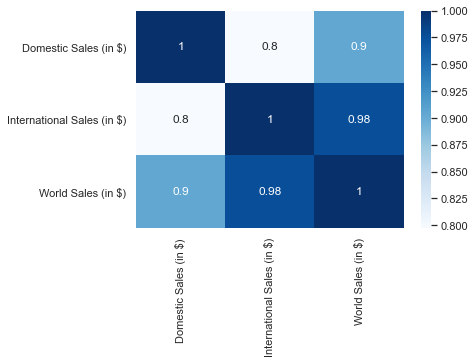

In [54]:
# seeing how different types of sales affect each other
sb.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

We know that World Sales are essentially the summation between Domestic Sales and International Sales and therefore it is not surprising if they have relatively high correlation coefficients. However, we can see also that Domestic Sales and International Sales are related with 0.8 correlation coefficient. This suggests that even though both types of sales represent totally different region of the sales, they can be a relatively good predictor to each other. This means that we can predict the sales that we might get from the international release by looking at how well the movie is performing in Domestic Sales.

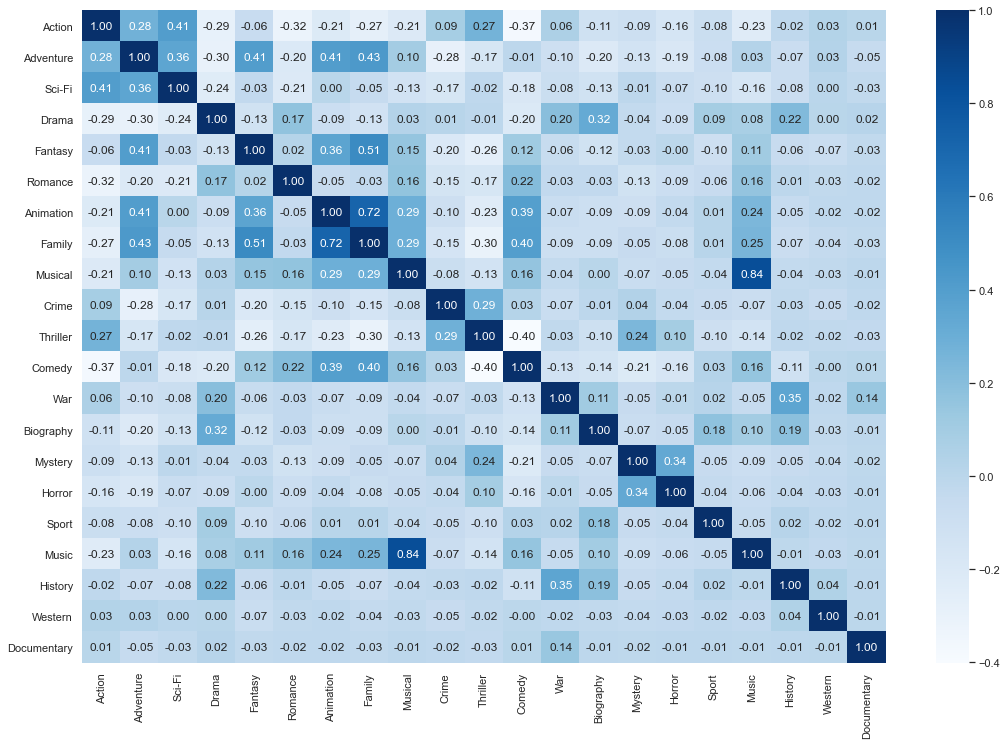

In [55]:
# seeing how different genres affect each other
fig, ax = plt.subplots(figsize=(18,12))    
sb.heatmap(df2.iloc[:,13:-1].corr(), annot=True, fmt='.2f', cmap="Blues")
plt.show()

As we can see from the dataset table that one movie can have multiple genres. From the heatmap above, we can see some relatively high correlation coefficient. The highest three are:
1. Music-Musical
2. Animation-Family
3. Fantasy-Family

This suggests that the movies in the table tend to have these genre together as a group in one movie.

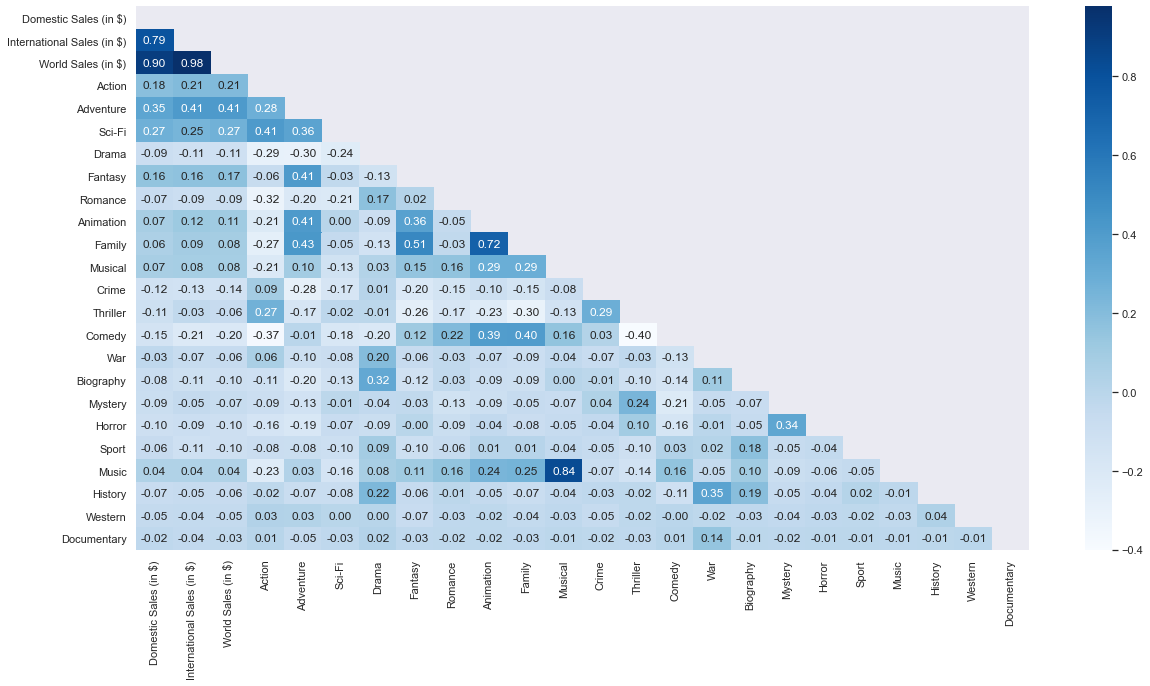

In [56]:
fig, ax = plt.subplots(figsize=(20,10))    

data = df2.iloc[:,[4,5,6] + list(range(13, 34, 1))]

# creating mask
mask = np.triu(np.ones_like(data.corr()))
 
# plotting a triangle correlation heatmap
sb.heatmap(data.corr(), annot=True, fmt='.2f', mask=mask, cmap="Blues")
plt.show()

When compared to the sales columns, the genre columns tend to have low correlation coefficients except 3 genres: Adventure, Sci-Fi, Action. This might suggest that these three genres have some relation or have significant impact to the movie sales.

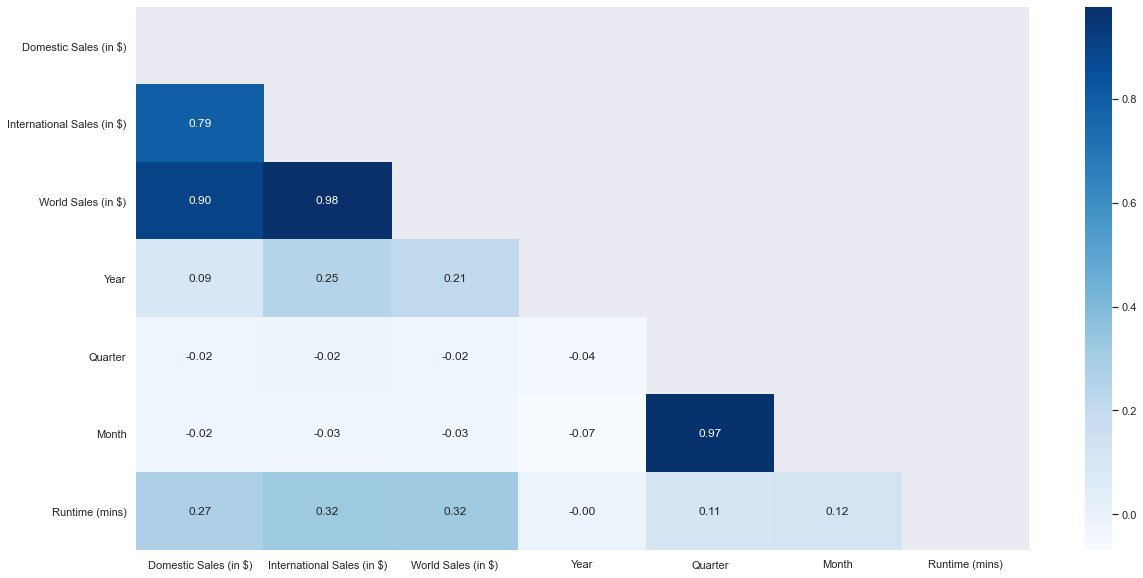

In [57]:
fig, ax = plt.subplots(figsize=(20,10))    

data = df2.iloc[:,[4,5,6,10,11,12,-1]]

# creating mask
mask = np.triu(np.ones_like(data.corr()))
 
# plotting a triangle correlation heatmap
sb.heatmap(data.corr(), annot=True, fmt='.2f', mask=mask, cmap="Blues")
plt.show()

Besides the genres, Movie Runtime and Year of release date seem to be the other variables that have relatively significant impact on the movie sales.